# Quantum Support Vector Machines

### The neccesary imports

In [1]:
# Generalimports:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Scikit learn imports:
from sklearn import datasets  #Houses a bunch of datasets.
from sklearn.model_selection import train_test_split  #Splits the data set into training and test set.
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Two types of scaling or regularizing (Standard ==> N(0,1)).
from sklearn.decomposition import PCA #We are going to use PCA for dimensionality reduction.
from sklearn.svm import SVC #The suppor vector classifier with a regularization parameter C
from sklearn.metrics import accuracy_score  #To determine the accuracy at the end.

### Data preperation:

- I have used the MNIST data set for handwritten digits

In [3]:
import tensorflow
from tensorflow.keras.datasets import mnist
(X_tr, Y_tr),(X_te,Y_te) = mnist.load_data()

- I have used 4 and 9 since they look most similar out of all possible combinations of 2.

In [4]:
x_train = []
y_train = []
for i in range(len(Y_tr)):
    if Y_tr[i]== 4 or Y_tr[i]== 9:
        x_train.append(X_tr[i].flatten())
        y_train.append(Y_tr[i])
        
        
x_test = []
y_test = []
for i in range(len(Y_te)):
    if Y_te[i]== 4 or Y_te[i]== 9:
        x_test.append(X_te[i].flatten())
        y_test.append(Y_te[i])
        
X_train = np.array(x_train)
Y_train = np.array(y_train)
X_test = np.array(x_test)
Y_test = np.array(y_test)

- We print the shapes

In [5]:
print("The shape of X_train is: ", X_train.shape)
print("The shape of Y_train is: ", Y_train.shape)
print("The shape of X_test is: ", X_test.shape)
print("The shape of Y_test is: ", Y_test.shape)

The shape of X_train is:  (11791, 784)
The shape of Y_train is:  (11791,)
The shape of X_test is:  (1991, 784)
The shape of Y_test is:  (1991,)


To get a visual confirmation of our image data, let us see an example:

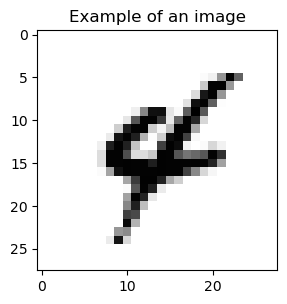

In [6]:
# Data point:  (point chosen at random from X_test)
x1 = (X_train[34]).reshape((28,28))

# Creating the plot:
pixel_plot = plt.figure()

# Plotting the plot
pixel_plot.add_axes([1,0.5,1,0.5])

# Title and configurations
plt.title("Example of an image")
pixel_plot = plt.imshow(x1, cmap = "Greys")

##### Data Pre-processing:

- We give the data points a zero-mean and unit- variance flavour. This corresponds to the standard normal.
- Then we use PCA to reduce the dimensionality to 5. (Dimensionality here would be a hyperparameter.)
- Then we scale the features such that their values have a range from -1 to +1

In [7]:
# Standardize
ss = StandardScaler()
X_train_ = ss.fit_transform(X_train)
X_test_ = ss.transform(X_test)

In [8]:
# Reduce dimensions
N_DIM = 12
pca = PCA(n_components=N_DIM)
X_train_ = pca.fit_transform(X_train_)
X_test_ = pca.transform(X_test_)

In [9]:
# Normalize
mms = MinMaxScaler((-1, 1))
X_train_ = mms.fit_transform(X_train_)
X_test_ = mms.transform(X_test_)

## The Classical Kernels:

We shall use the following Kernels to compare it later on (with the various Quantum Kernels). These could be thought of as classical baseline models:
- RBF
- Linear
- Polynomial (degree 15)
- Sigmoid

### The RBF Kernel:

In [10]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train_, Y_train)
rbf_score = rbf_svc.score(X_test_, Y_test)

____________________________________________________________________________________________
Example number:1
The actual label is:4
The predicted label is: [4]
____________________________________________________________________________________________
Example number:2
The actual label is:4
The predicted label is: [4]
____________________________________________________________________________________________
Example number:3
The actual label is:9
The predicted label is: [9]
____________________________________________________________________________________________
Example number:4
The actual label is:9
The predicted label is: [9]
____________________________________________________________________________________________
Example number:5
The actual label is:9
The predicted label is: [9]
____________________________________________________________________________________________
Example number:6
The actual label is:9
The predicted label is: [9]
________________________________________

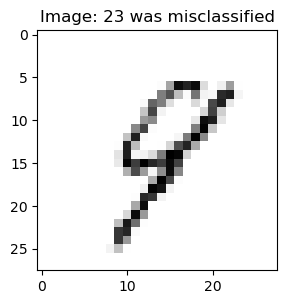

In [11]:
for i in range(50):
    x1_ = X_test_[i].reshape(1, -1)
    print("____________________________________________________________________________________________")
    print(f"Example number:{i+1}")
    print(f"The actual label is:{Y_test[i]}")
    print(f"The predicted label is: {rbf_svc.predict(x1_)}")
    
    if int(rbf_svc.predict(x1_)) != Y_test[i]:
        x1 = (X_test[i]).reshape((28,28))
        pixel_plot = plt.figure()
        pixel_plot.add_axes([1,0.5,1,0.5])
        plt.title(f"Image: {i+1} was misclassified")
        pixel_plot = plt.imshow(x1, cmap = "Greys")

In [12]:
print(f'RBF kernel classification score {rbf_score*100}%')

RBF kernel classification score 96.08237066800602%


### The Linear Kernel:

In [13]:
Linear_svc = SVC(kernel='linear')
Linear_svc.fit(X_train_, Y_train)
Linear_score = Linear_svc.score(X_test_, Y_test)

____________________________________________________________________________________________
Example number:1
The actual label is:4
The predicted label is: [4]
____________________________________________________________________________________________
Example number:2
The actual label is:4
The predicted label is: [4]
____________________________________________________________________________________________
Example number:3
The actual label is:9
The predicted label is: [9]
____________________________________________________________________________________________
Example number:4
The actual label is:9
The predicted label is: [9]
____________________________________________________________________________________________
Example number:5
The actual label is:9
The predicted label is: [9]
____________________________________________________________________________________________
Example number:6
The actual label is:9
The predicted label is: [9]
________________________________________

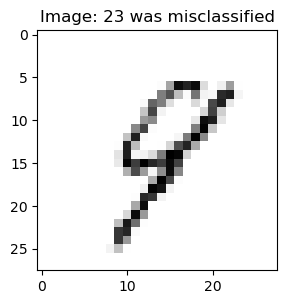

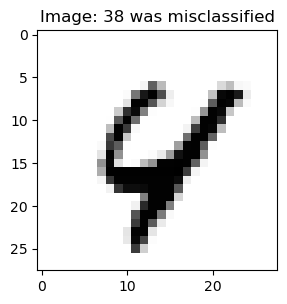

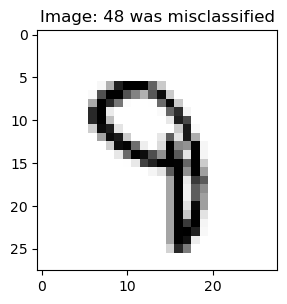

In [14]:
for i in range(50):
    x1_ = X_test_[i].reshape(1, -1)
    print("____________________________________________________________________________________________")
    print(f"Example number:{i+1}")
    print(f"The actual label is:{Y_test[i]}")
    print(f"The predicted label is: {Linear_svc.predict(x1_)}")
    
    if int(Linear_svc.predict(x1_)) != Y_test[i]:
        x1 = (X_test[i]).reshape((28,28))
        pixel_plot = plt.figure()
        pixel_plot.add_axes([1,0.5,1,0.5])
        plt.title(f"Image: {i+1} was misclassified")
        pixel_plot = plt.imshow(x1, cmap = "Greys")

In [15]:
print(f'Linear kernel classification score {Linear_score*100}%')

Linear kernel classification score 93.26971371170266%


### The Polynomial Kernel:

In [16]:
poly_svc = SVC(kernel='poly',degree = 15)
poly_svc.fit(X_train_, Y_train)
poly_score = poly_svc.score(X_test_, Y_test)

____________________________________________________________________________________________
Example number:1
The actual label is:4
The predicted label is: [4]
____________________________________________________________________________________________
Example number:2
The actual label is:4
The predicted label is: [4]
____________________________________________________________________________________________
Example number:3
The actual label is:9
The predicted label is: [9]
____________________________________________________________________________________________
Example number:4
The actual label is:9
The predicted label is: [9]
____________________________________________________________________________________________
Example number:5
The actual label is:9
The predicted label is: [9]
____________________________________________________________________________________________
Example number:6
The actual label is:9
The predicted label is: [9]
________________________________________

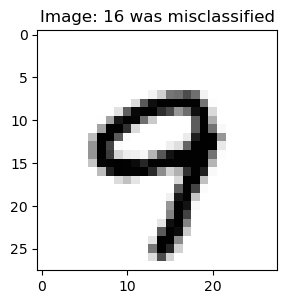

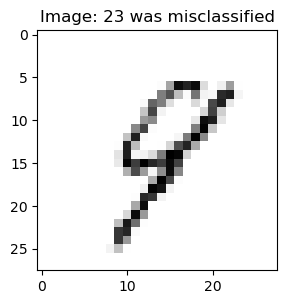

In [19]:
for i in range(50):
    x1_ = X_test_[i].reshape(1, -1)
    print("____________________________________________________________________________________________")
    print(f"Example number:{i+1}")
    print(f"The actual label is:{Y_test[i]}")
    print(f"The predicted label is: {poly_svc.predict(x1_)}")
    
    if int(poly_svc.predict(x1_)) != Y_test[i]:
        x1 = (X_test[i]).reshape((28,28))
        pixel_plot = plt.figure()
        pixel_plot.add_axes([1,0.5,1,0.5])
        plt.title(f"Image: {i+1} was misclassified")
        pixel_plot = plt.imshow(x1, cmap = "Greys")

In [20]:
print(f'Polynomial (degree 15) kernel classification score {poly_score*100}%')

Polynomial (degree 15) kernel classification score 94.77649422400803%


### The Sigmoid Kernel:

In [21]:
sigmoid_svc = SVC(kernel='sigmoid')
sigmoid_svc.fit(X_train_, Y_train)
sigmoid_score = sigmoid_svc.score(X_test_, Y_test)

____________________________________________________________________________________________
Example number:1
The actual label is:4
The predicted label is: [4]
____________________________________________________________________________________________
Example number:2
The actual label is:4
The predicted label is: [4]
____________________________________________________________________________________________
Example number:3
The actual label is:9
The predicted label is: [9]
____________________________________________________________________________________________
Example number:4
The actual label is:9
The predicted label is: [9]
____________________________________________________________________________________________
Example number:5
The actual label is:9
The predicted label is: [4]
____________________________________________________________________________________________
Example number:6
The actual label is:9
The predicted label is: [4]
________________________________________

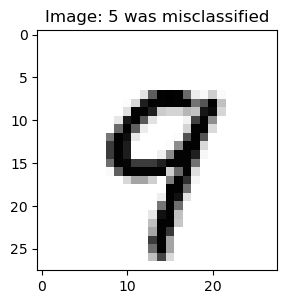

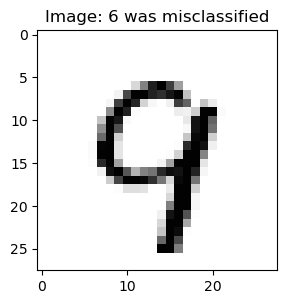

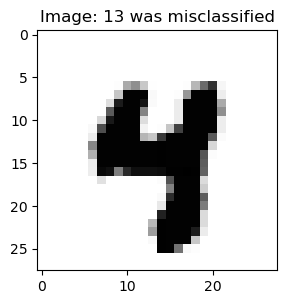

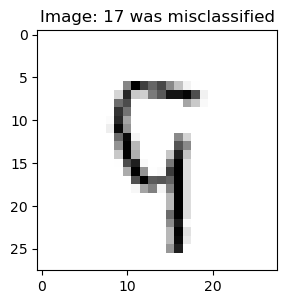

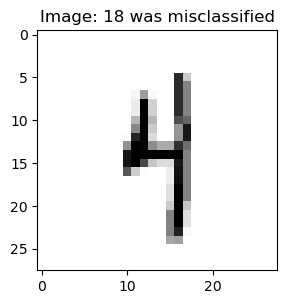

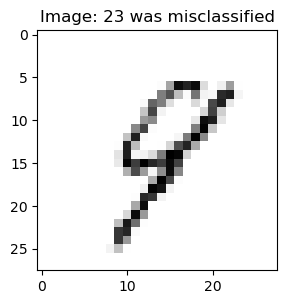

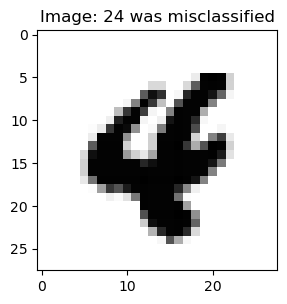

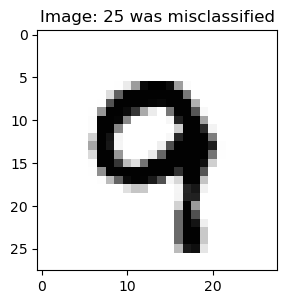

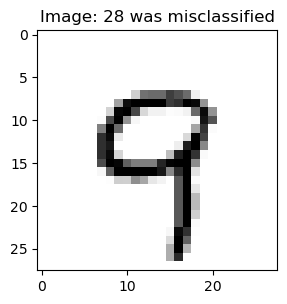

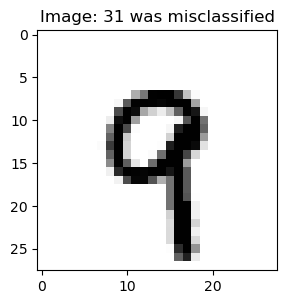

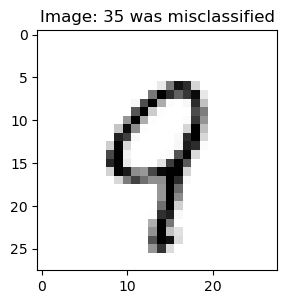

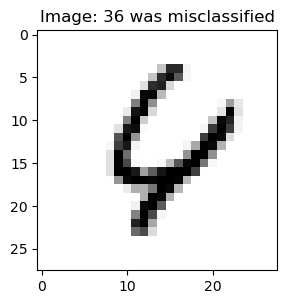

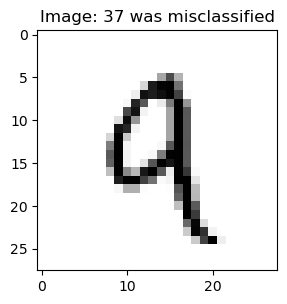

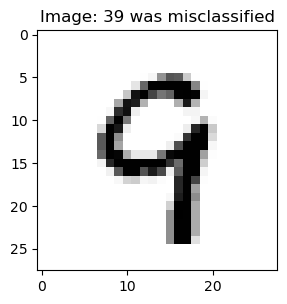

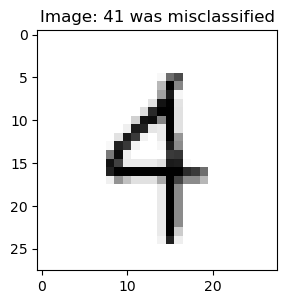

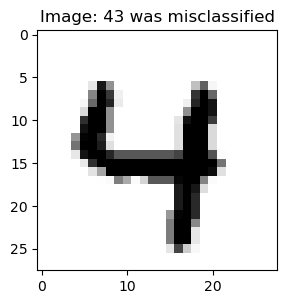

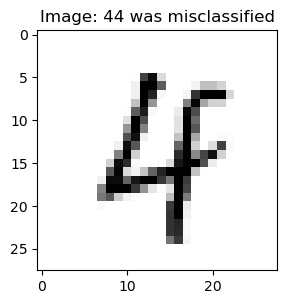

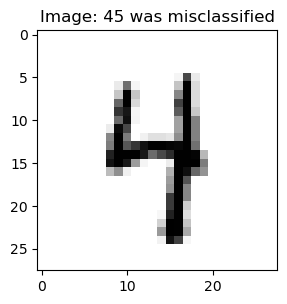

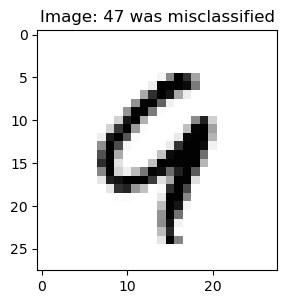

In [22]:
for i in range(50):
    x1_ = X_test_[i].reshape(1, -1)
    print("____________________________________________________________________________________________")
    print(f"Example number:{i+1}")
    print(f"The actual label is:{Y_test[i]}")
    print(f"The predicted label is: {sigmoid_svc.predict(x1_)}")
    
    if int(sigmoid_svc.predict(x1_)) != Y_test[i]:
        x1 = (X_test[i]).reshape((28,28))
        pixel_plot = plt.figure()
        pixel_plot.add_axes([1,0.5,1,0.5])
        plt.title(f"Image: {i+1} was misclassified")
        pixel_plot = plt.imshow(x1, cmap = "Greys")
    
    

print(f'RBF kernel classification score {rbf_score*100}%')

In [23]:
print(f'Sigmoid kernel classification score {sigmoid_score*100}%')

Sigmoid kernel classification score 58.31240582621798%
